In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns#; sns.set_theme()
import pyriemann

In [63]:
%load_ext autoreload
%autoreload 2
import utils.generators as gs 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
A, B = gs.genrate_matrix(-0.9), gs.genrate_matrix(0.9)
I = gs.identity_matrix()

In [65]:
xs, y1s, y2s, zs = gs.mesh_surface(limit=3)

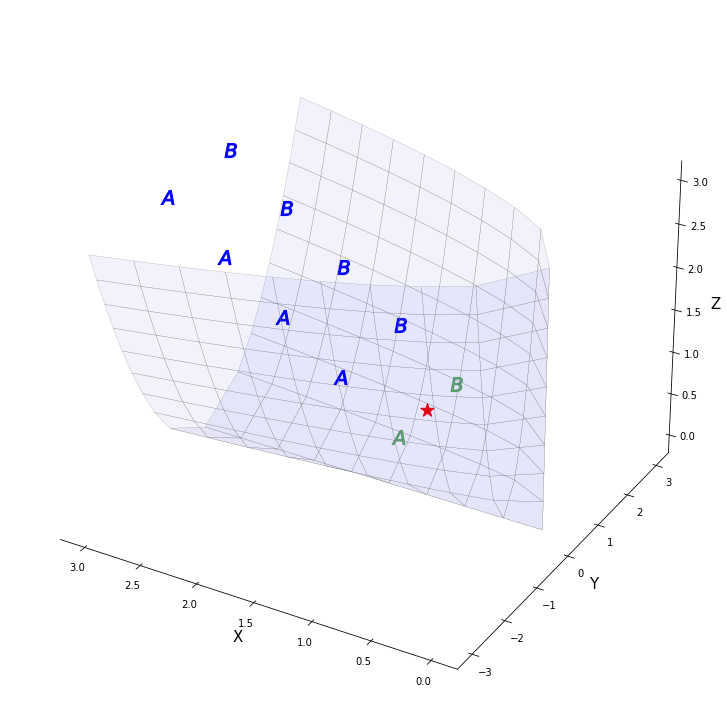

In [66]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xs, y1s, zs, linewidth=0.2, antialiased=True, color='blue', edgecolor = 'gray', alpha=0.05)
ax.plot_surface(xs, y2s, zs, linewidth=0.2, antialiased=True, color='blue', edgecolor = 'gray', alpha=0.05)
#ax.plot_trisurf(xs, ybs, zs, linewidth=0.2, antialiased=True, color='gray', alpha=0.1)

ax.scatter(*gs.get_field(I), color='r', marker='*', s=200, label=f'I={gs.get_str(I)}')

for s, M in zip(['A','B'],[A,B]):
    ax.scatter(*gs.get_field(M), color='g', marker=f'${s}$', s=200, alpha=0.5)
    for t in np.linspace(0.5, 2, 4):
        ax.scatter(*gs.get_field(M+I*t), color='b', marker=f'${s}$', s=200)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        
ax.invert_xaxis()
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_zlabel('Z', fontsize=15)
#plt.legend()            
plt.show()

In [67]:
for t in np.linspace(0, 2, 2):
    print(f'Tau={t}')
    gs.distances_two(A+I*t, B+I*t)
    print('')

Tau=0.0
[[ 1.  -0.9]
 [-0.9  1. ]]
  matrix  euclidean  geodesick
0     AB        1.8       4.16

Tau=2.0
[[ 3.  -0.9]
 [-0.9  3. ]]
  matrix  euclidean  geodesick
0     AB        1.8       0.88



### Tangent Space

In [132]:
projection = pyriemann.tangentspace.TangentSpace(metric='riemann')

In [133]:
taus = np.linspace(0, 20, 40)
taus

array([ 0.        ,  0.51282051,  1.02564103,  1.53846154,  2.05128205,
        2.56410256,  3.07692308,  3.58974359,  4.1025641 ,  4.61538462,
        5.12820513,  5.64102564,  6.15384615,  6.66666667,  7.17948718,
        7.69230769,  8.20512821,  8.71794872,  9.23076923,  9.74358974,
       10.25641026, 10.76923077, 11.28205128, 11.79487179, 12.30769231,
       12.82051282, 13.33333333, 13.84615385, 14.35897436, 14.87179487,
       15.38461538, 15.8974359 , 16.41025641, 16.92307692, 17.43589744,
       17.94871795, 18.46153846, 18.97435897, 19.48717949, 20.        ])

In [134]:
testFCs = []
retestFCs = []
for t in taus:
    print(f'Tau={t}')
    testFCs.append(A+I*t)
    retestFCs.append(B+I*t)
    #taus.append(np.round(t,1))
    print('')
FCs = np.array([testFCs,
              retestFCs])
FCs.shape

Tau=0.0

Tau=0.5128205128205128

Tau=1.0256410256410255

Tau=1.5384615384615383

Tau=2.051282051282051

Tau=2.564102564102564

Tau=3.0769230769230766

Tau=3.5897435897435894

Tau=4.102564102564102

Tau=4.615384615384615

Tau=5.128205128205128

Tau=5.6410256410256405

Tau=6.153846153846153

Tau=6.666666666666666

Tau=7.179487179487179

Tau=7.692307692307692

Tau=8.205128205128204

Tau=8.717948717948717

Tau=9.23076923076923

Tau=9.743589743589743

Tau=10.256410256410255

Tau=10.769230769230768

Tau=11.282051282051281

Tau=11.794871794871794

Tau=12.307692307692307

Tau=12.82051282051282

Tau=13.333333333333332

Tau=13.846153846153845

Tau=14.358974358974358

Tau=14.87179487179487

Tau=15.384615384615383

Tau=15.897435897435896

Tau=16.41025641025641

Tau=16.92307692307692

Tau=17.435897435897434

Tau=17.94871794871795

Tau=18.46153846153846

Tau=18.97435897435897

Tau=19.487179487179485

Tau=20.0



(2, 40, 2, 2)

In [135]:
projection.fit(FCs[0])

TangentSpace()

In [136]:
ya = projection.transform(FCs[0])
ya.shape

yb = projection.transform(FCs[1])
yb.shape

(40, 3)

In [137]:
def fill_from_vector(v, n):
    matrix = np.zeros((n, n))
    i_upp = np.triu_indices(n, 0) # 1 skip diagonal, 0 include diagonal
    matrix[i_upp] = v
    i_low = np.tril_indices(n, -1)
    matrix[i_low] = matrix.T[i_low]
    
    return matrix

In [138]:
tangent_fcsa = []
tangent_fcsb = []
for tva, tvb in zip(ya, yb):
    print(tva)
    mat = fill_from_vector(tva, 2)
    print(mat)
    mat.shape
    tangent_fcsa.append(mat)
    
    mat = fill_from_vector(tvb, 2)
    print(mat)
    mat.shape
    tangent_fcsb.append(mat)
    print('')

[-2.97235477 -1.84888341 -2.97235477]
[[-2.97235477 -1.84888341]
 [-1.84888341 -2.97235477]]
[[-2.97235477  2.31518212]
 [ 2.31518212 -2.97235477]]

[-1.94643256 -0.73592606 -1.94643256]
[[-1.94643256 -0.73592606]
 [-0.73592606 -1.94643256]]
[[-1.94643256  1.20222476]
 [ 1.20222476 -1.94643256]]

[-1.54605602 -0.44225142 -1.54605602]
[[-1.54605602 -0.44225142]
 [-0.44225142 -1.54605602]]
[[-1.54605602  0.90855013]
 [ 0.90855013 -1.54605602]]

[-1.27759824 -0.29100516 -1.27759824]
[[-1.27759824 -0.29100516]
 [-0.29100516 -1.27759824]]
[[-1.27759824  0.75730387]
 [ 0.75730387 -1.27759824]]

[-1.07193713 -0.19675469 -1.07193713]
[[-1.07193713 -0.19675469]
 [-0.19675469 -1.07193713]]
[[-1.07193713  0.6630534 ]
 [ 0.6630534  -1.07193713]]

[-0.90402144 -0.13185984 -0.90402144]
[[-0.90402144 -0.13185984]
 [-0.13185984 -0.90402144]]
[[-0.90402144  0.59815855]
 [ 0.59815855 -0.90402144]]

[-0.76162667 -0.08426996 -0.76162667]
[[-0.76162667 -0.08426996]
 [-0.08426996 -0.76162667]]
[[-0.76162667

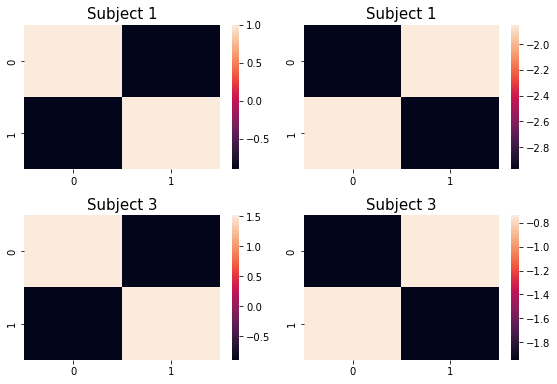

In [140]:
fig = plt.figure(figsize=(8,10.5))

k = 1
for i, j in zip(FCs[0][:2], tangent_fcsa[:2]):
    #print(i)
    ax = fig.add_subplot(4, 2, k)
    plt.title(f'Subject {k}', fontsize=15)
    sns.heatmap(i)
    ax = fig.add_subplot(4, 2, k+1)
    plt.title(f'Subject {k}', fontsize=15)
    sns.heatmap(j)
    
    k += 2
plt.tight_layout()

t=0.0: -3.0,-1.8,-3.0
t=0.5: -1.9,-0.7,-1.9
t=1.0: -1.5,-0.4,-1.5
t=1.5: -1.3,-0.3,-1.3
t=2.1: -1.1,-0.2,-1.1
t=2.6: -0.9,-0.1,-0.9
t=3.1: -0.8,-0.1,-0.8
t=3.6: -0.6,-0.0,-0.6
t=4.1: -0.5,-0.0,-0.5
t=4.6: -0.4,0.0,-0.4
t=5.1: -0.3,0.0,-0.3
t=5.6: -0.3,0.0,-0.3
t=6.2: -0.2,0.1,-0.2
t=6.7: -0.1,0.1,-0.1
t=7.2: -0.0,0.1,-0.0
t=7.7: 0.0,0.1,0.0
t=8.2: 0.1,0.1,0.1
t=8.7: 0.1,0.1,0.1
t=9.2: 0.2,0.1,0.2
t=9.7: 0.2,0.1,0.2
t=10.3: 0.3,0.1,0.3
t=10.8: 0.3,0.1,0.3
t=11.3: 0.4,0.1,0.4
t=11.8: 0.4,0.1,0.4
t=12.3: 0.4,0.1,0.4
t=12.8: 0.5,0.1,0.5
t=13.3: 0.5,0.1,0.5
t=13.8: 0.6,0.1,0.6
t=14.4: 0.6,0.2,0.6
t=14.9: 0.6,0.2,0.6
t=15.4: 0.7,0.2,0.7
t=15.9: 0.7,0.2,0.7
t=16.4: 0.7,0.2,0.7
t=16.9: 0.7,0.2,0.7
t=17.4: 0.8,0.2,0.8
t=17.9: 0.8,0.2,0.8
t=18.5: 0.8,0.2,0.8
t=19.0: 0.9,0.2,0.9
t=19.5: 0.9,0.2,0.9
t=20.0: 0.9,0.2,0.9


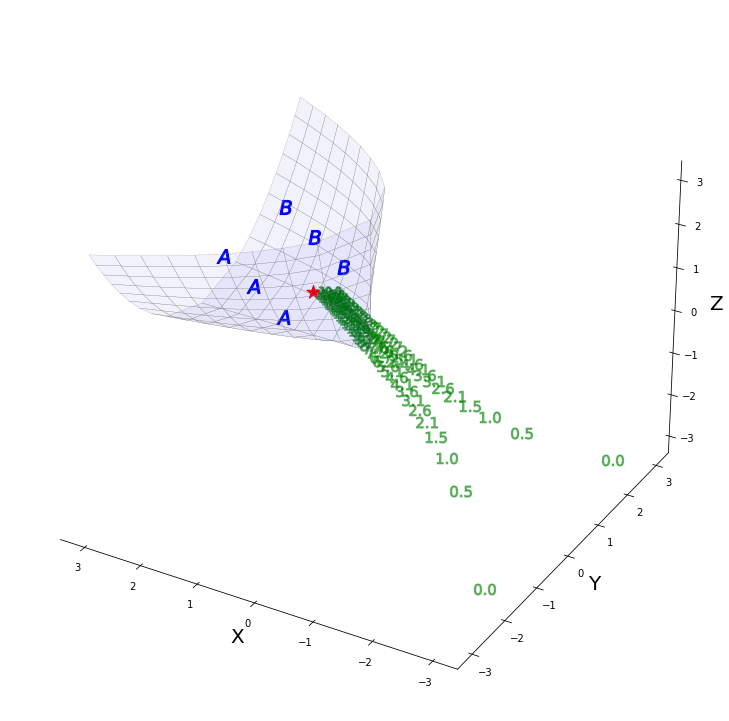

In [141]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xs, y1s, zs, linewidth=0.2, antialiased=True, color='blue', edgecolor = 'gray', alpha=0.05)
ax.plot_surface(xs, y2s, zs, linewidth=0.2, antialiased=True, color='blue', edgecolor = 'gray', alpha=0.05)
#ax.plot_trisurf(xs, ybs, zs, linewidth=0.2, antialiased=True, color='gray', alpha=0.1)

ax.scatter(*gs.get_field(I), color='r', marker='*', s=200, label=f'I={gs.get_str(I)}')

for s, M in zip(['A','B'],[A,B]):
    #ax.scatter(*gs.get_field(M), color='g', marker=f'${s}$', s=200, alpha=0.5)
    for t in taus[:3]:
        #print(gs.get_str(M+I*t))
        ax.scatter(*gs.get_field(M+I*t), color='b', marker=f'${s}$', s=200)
        
for t, M in zip(taus, tangent_fcsa):
    print(f't={np.round(t,1)}: {gs.get_str(np.round(M,1))}')
    ax.scatter(*gs.get_field(M), color='g', marker=f'${np.round(t,1)}$', s=500, alpha=0.5)
    
for t, M in zip(taus, tangent_fcsb):
    #print(f't={np.round(t,1)}: {gs.get_str(np.round(M,1))}')
    ax.scatter(*gs.get_field(M), color='g', marker=f'${np.round(t,1)}$', s=500, alpha=0.5)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        
ax.invert_xaxis()
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)
#plt.legend()            
plt.show()

t=0.0: -3.0,-1.8,-3.0
t=0.5: -1.9,-0.7,-1.9
t=1.0: -1.5,-0.4,-1.5
t=1.5: -1.3,-0.3,-1.3
t=2.1: -1.1,-0.2,-1.1
t=2.6: -0.9,-0.1,-0.9
t=3.1: -0.8,-0.1,-0.8
t=3.6: -0.6,-0.0,-0.6
t=4.1: -0.5,-0.0,-0.5
t=4.6: -0.4,0.0,-0.4
t=5.1: -0.3,0.0,-0.3
t=5.6: -0.3,0.0,-0.3
t=6.2: -0.2,0.1,-0.2
t=6.7: -0.1,0.1,-0.1
t=7.2: -0.0,0.1,-0.0
t=7.7: 0.0,0.1,0.0
t=8.2: 0.1,0.1,0.1
t=8.7: 0.1,0.1,0.1
t=9.2: 0.2,0.1,0.2
t=9.7: 0.2,0.1,0.2
t=10.3: 0.3,0.1,0.3
t=10.8: 0.3,0.1,0.3
t=11.3: 0.4,0.1,0.4
t=11.8: 0.4,0.1,0.4
t=12.3: 0.4,0.1,0.4
t=12.8: 0.5,0.1,0.5
t=13.3: 0.5,0.1,0.5
t=13.8: 0.6,0.1,0.6
t=14.4: 0.6,0.2,0.6
t=14.9: 0.6,0.2,0.6
t=15.4: 0.7,0.2,0.7
t=15.9: 0.7,0.2,0.7
t=16.4: 0.7,0.2,0.7
t=16.9: 0.7,0.2,0.7
t=17.4: 0.8,0.2,0.8
t=17.9: 0.8,0.2,0.8
t=18.5: 0.8,0.2,0.8
t=19.0: 0.9,0.2,0.9
t=19.5: 0.9,0.2,0.9
t=20.0: 0.9,0.2,0.9


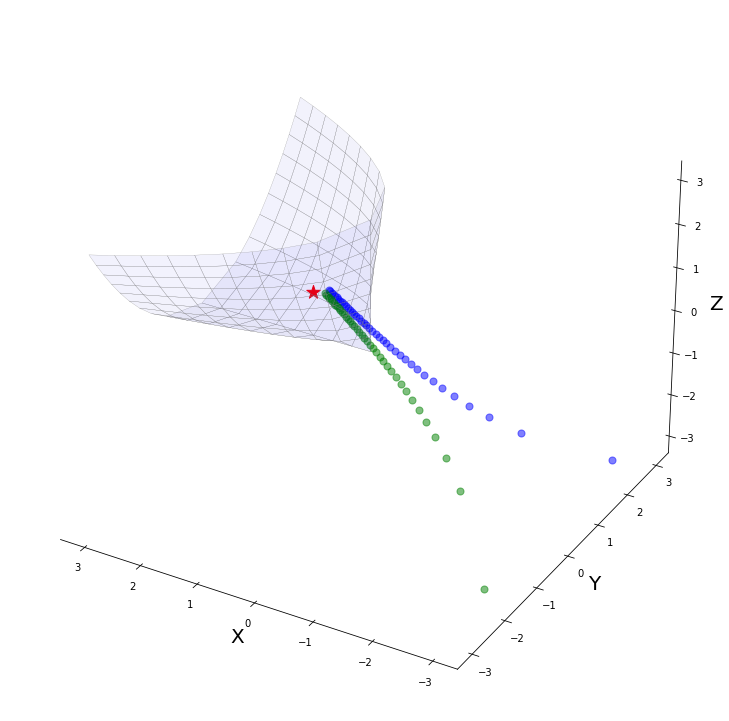

In [142]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xs, y1s, zs, linewidth=0.2, antialiased=True, color='blue', edgecolor = 'gray', alpha=0.05)
ax.plot_surface(xs, y2s, zs, linewidth=0.2, antialiased=True, color='blue', edgecolor = 'gray', alpha=0.05)
#ax.plot_trisurf(xs, ybs, zs, linewidth=0.2, antialiased=True, color='gray', alpha=0.1)

ax.scatter(*gs.get_field(I), color='r', marker='*', s=200, label=f'I={gs.get_str(I)}')

for t, M in zip(taus, tangent_fcsa):
    print(f't={np.round(t,1)}: {gs.get_str(np.round(M,1))}')
    ax.scatter(*gs.get_field(M), color='g', s=50, alpha=0.5)
    
    
for t, M in zip(taus, tangent_fcsb):
    #print(f't={np.round(t,1)}: {gs.get_str(np.round(M,1))}')
    ax.scatter(*gs.get_field(M), color='b', s=50, alpha=0.5)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        
ax.invert_xaxis()
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)
#plt.legend()            
plt.show()

t=2.6: -0.9,-0.1,-0.9
t=3.1: -0.8,-0.1,-0.8
t=3.6: -0.6,-0.0,-0.6
t=4.1: -0.5,-0.0,-0.5
t=4.6: -0.4,0.0,-0.4
t=5.1: -0.3,0.0,-0.3
t=5.6: -0.3,0.0,-0.3
t=6.2: -0.2,0.1,-0.2
t=6.7: -0.1,0.1,-0.1
t=7.2: -0.0,0.1,-0.0
t=7.7: 0.0,0.1,0.0
t=8.2: 0.1,0.1,0.1
t=8.7: 0.1,0.1,0.1
t=9.2: 0.2,0.1,0.2
t=9.7: 0.2,0.1,0.2
t=10.3: 0.3,0.1,0.3
t=10.8: 0.3,0.1,0.3
t=11.3: 0.4,0.1,0.4
t=11.8: 0.4,0.1,0.4
t=12.3: 0.4,0.1,0.4
t=12.8: 0.5,0.1,0.5
t=13.3: 0.5,0.1,0.5
t=13.8: 0.6,0.1,0.6
t=14.4: 0.6,0.2,0.6
t=14.9: 0.6,0.2,0.6
t=15.4: 0.7,0.2,0.7
t=15.9: 0.7,0.2,0.7
t=16.4: 0.7,0.2,0.7
t=16.9: 0.7,0.2,0.7
t=17.4: 0.8,0.2,0.8
t=17.9: 0.8,0.2,0.8
t=18.5: 0.8,0.2,0.8
t=19.0: 0.9,0.2,0.9
t=19.5: 0.9,0.2,0.9
t=20.0: 0.9,0.2,0.9


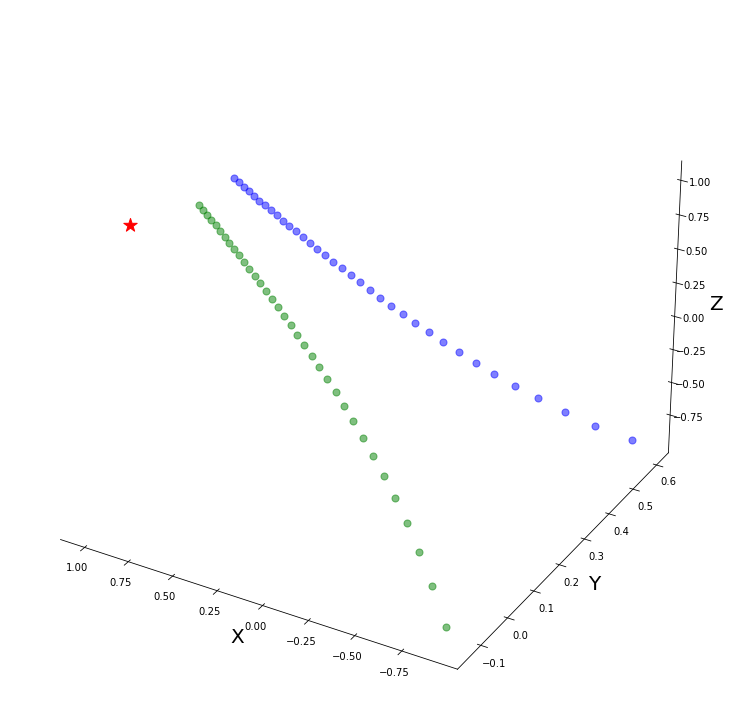

In [145]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(projection='3d')


ax.scatter(*gs.get_field(I), color='r', marker='*', s=200, label=f'I={gs.get_str(I)}')

for t, M in zip(taus[5:], tangent_fcs[5:]):
    print(f't={np.round(t,1)}: {gs.get_str(np.round(M,1))}')
    ax.scatter(*gs.get_field(M), color='g', s=50, alpha=0.5)
    
    
for t, M in zip(taus[5:], tangent_fcsb[5:]):
    #print(f't={np.round(t,1)}: {gs.get_str(np.round(M,1))}')
    ax.scatter(*gs.get_field(M), color='b', s=50, alpha=0.5)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        
ax.invert_xaxis()
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)
#plt.legend()            
plt.show()